In [2]:
#from statsmodels.tsa.arima_process import ArmaProcess 
from statsmodels.tsa.stattools import pacf, acf
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
from pandas import Series
import random
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy import eye, asarray, dot, sum, diag
from scipy.linalg import svd
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
from netCDF4 import Dataset
from numpy import linspace
from numpy import meshgrid
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import grangercausalitytests

import PCA_functions as pf
import Extreme_functions as ef

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr, CMIknn
import tigramite.data_processing as pp


from sklearn.cluster import AgglomerativeClustering, DBSCAN

from statsmodels.tsa.stattools import adfuller
from Data import Data
from datetime import datetime

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import itertools
from collections import Counter
import pickle

from numpy import linalg as LA

import matplotlib.cm as cm

from scipy.special import inv_boxcox
from scipy import stats

from matplotlib import animation

import scipy.stats as st

import reverse_geocoder as rg

from pandas_datareader import wb
import scipy.stats as st

import Rung as rung

plt.rcParams["figure.figsize"] = (5,5)

from pandas_datareader import wb

import seaborn as sns

from sklearn import preprocessing

import seaborn as sns
import feature_finder_station as ff
import feature_finder1 as ff1
from statsmodels.tsa.stattools import adfuller

plt.rcParams["figure.figsize"] = (20,10)

from scipy import stats

In [21]:
base = []
model = []
model_V = []
corr_V = []
corr = []
for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_V/model_V_V_{}.npy".format(tau))))
    corr_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_V/model_V_V_corr_{}.npy".format(tau))))

base = np.sqrt(base)/303
model = np.sqrt(model)/303
model_V = np.sqrt(model_V)/303
corr_V = np.sqrt(corr_V)/303
corr = np.sqrt(corr)/303

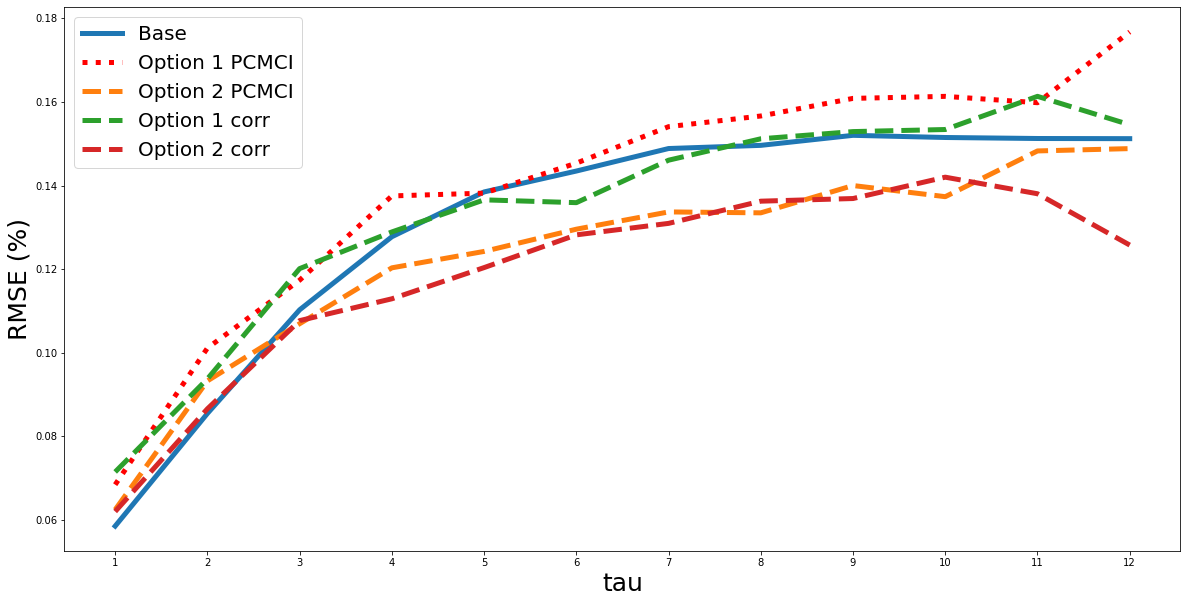

In [24]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_V, label = 'Option 1 PCMCI', linewidth=5, linestyle="dotted", color='red')
plt.plot(tau, model, label = 'Option 2 PCMCI', linewidth=5, linestyle="dashed")
plt.plot(tau, corr_V, label = 'Option 1 corr', linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = 'Option 2 corr', linewidth=5, linestyle="dashed")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("V Options.png")

In [36]:
base = []
model = []
model_d = []
corr_d = []
corr = []
n_count = 303
for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    model_d.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))
    corr_d.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_corr_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))

base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
model_d = np.sqrt(model_d)/n_count
corr_d = np.sqrt(corr_d)/n_count
corr = np.sqrt(corr)/n_count

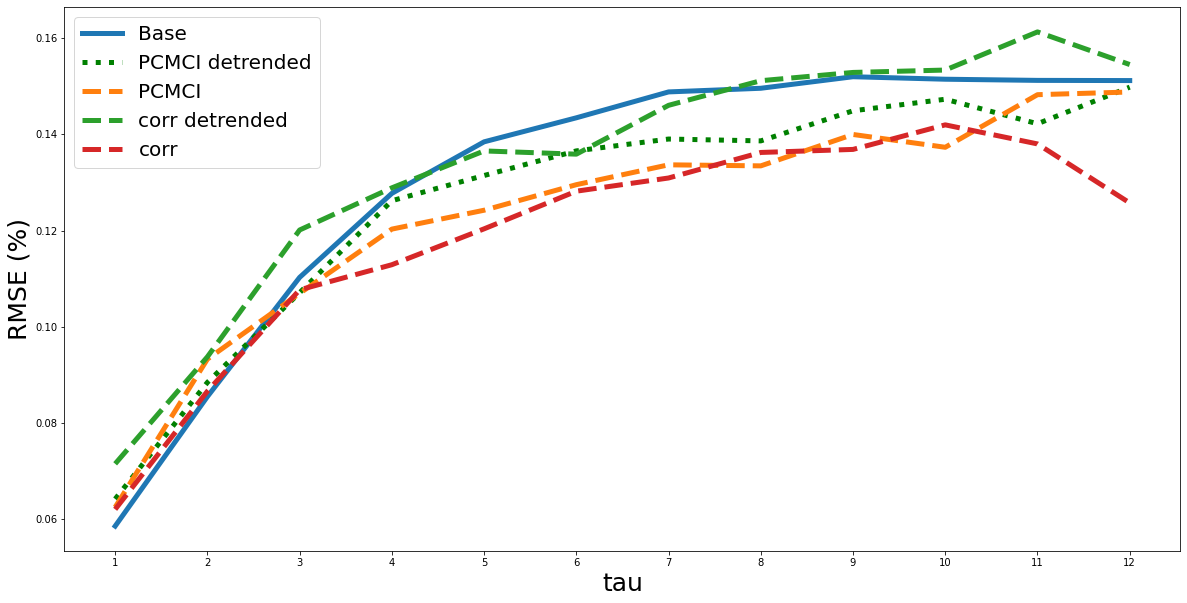

In [37]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_d, label = 'PCMCI detrended', linewidth=5, linestyle="dotted", color='green')
plt.plot(tau, model, label = 'PCMCI', linewidth=5, linestyle="dashed")
plt.plot(tau, corr_V, label = 'corr detrended', linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = 'corr', linewidth=5, linestyle="dashed")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("Detrending.png")

In [15]:
base = []
model = []
corr = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_all_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_all_V_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_all_corr_{}.npy".format(tau))))


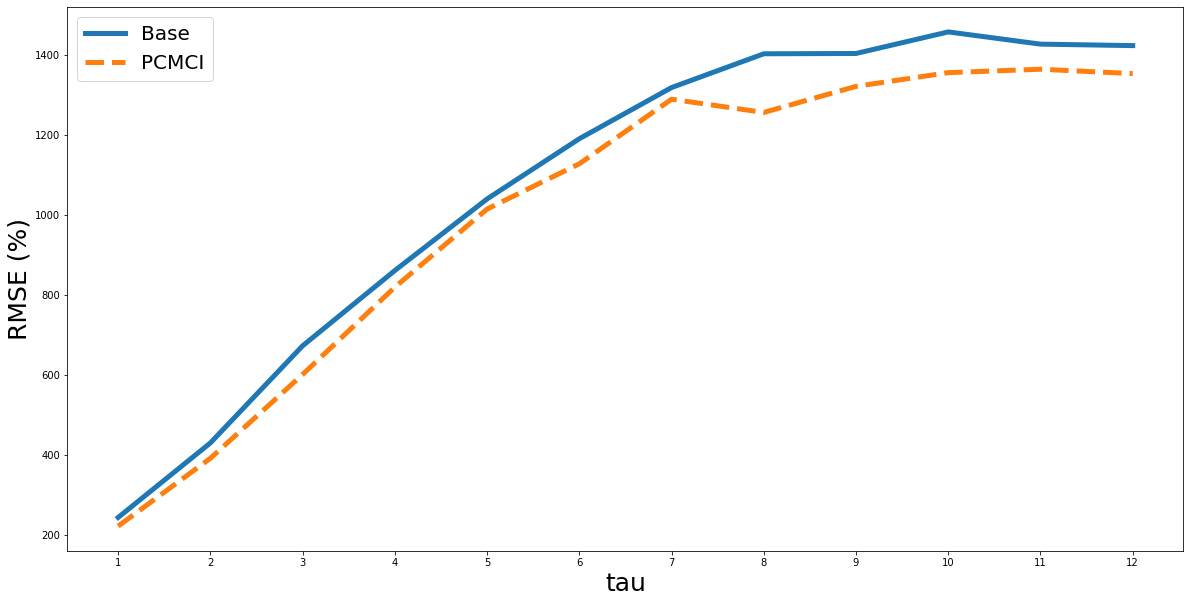

In [17]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = 'PCMCI', linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = 'CORR', linewidth=5, linestyle="dotted")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("Detrending.png")

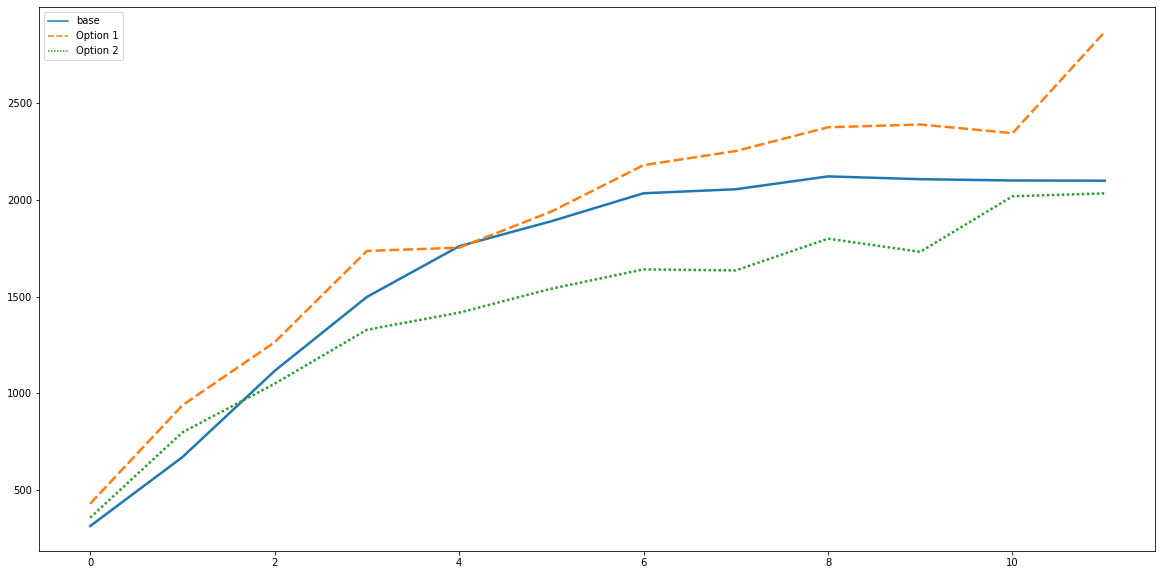

In [15]:
#sns.set_theme(style="whitegrid")


#dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame({'base':base, 'Option 1':model_V, 'Option 2':model})


sns.lineplot(data=data, palette="tab10", linewidth=2.5)

Data: from 1926 to 2015

Using 35 years as training set and 5 years test set and sliding window of 5 years 

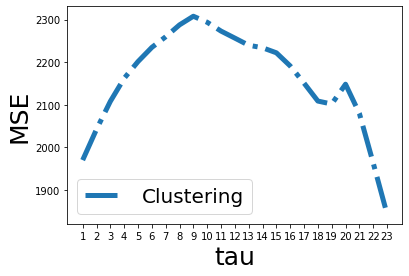

In [7]:
clus = []

for tau in range(1,24):
    clus.append(np.nanmean(np.load("./new3/model_clustering_{}.npy".format(tau))))
    
tau = np.arange(1,24)
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [64]:
np.arange(1926,1977,5)

array([1926, 1931, 1936, 1941, 1946, 1951, 1956, 1961, 1966, 1971, 1976])

In [65]:
np.arange(1960,2011,5)

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

# California

In [5]:
#BSk
base = []
corr = []
model = []
n_count = 105
class_name = "BSk"
for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_cal/base_V_{}_{}.npy".format(tau, class_name)))
    corr.append(np.load("../../whole_data_results/new_rotated_cal/model_V_corr_{}_{}.npy".format(tau, class_name)))
    model.append(np.load("../../whole_data_results/new_rotated_cal/model_V_{}_{}.npy".format(tau, class_name)))
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

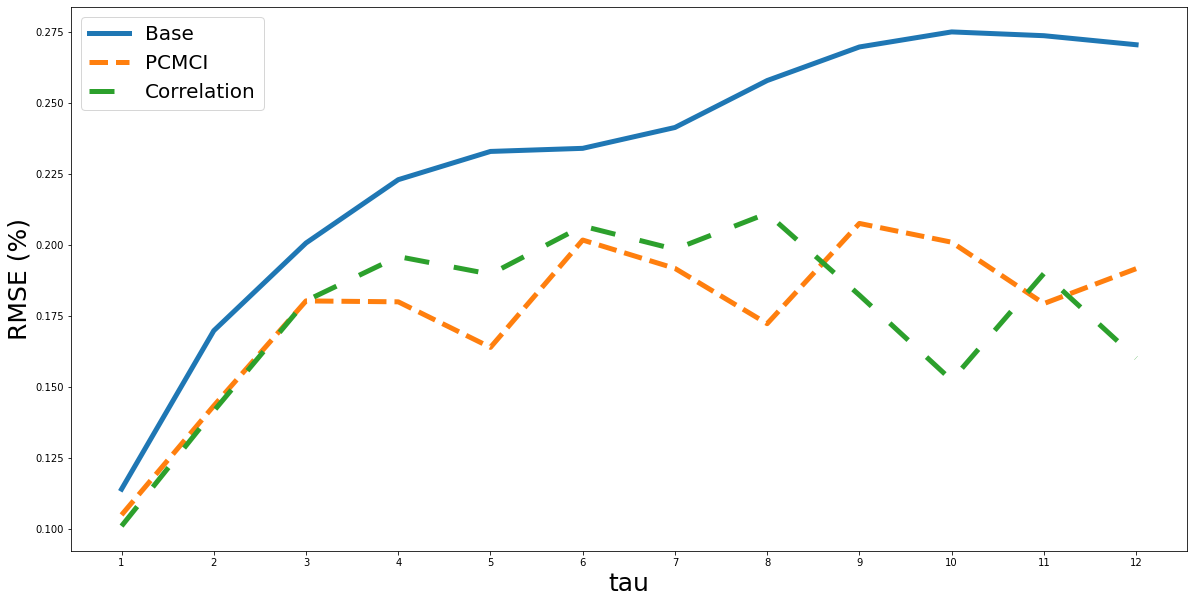

In [6]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("CAL197616Csb.png")

In [90]:
base = []
corr = []
model = []
shift = -1
n_count = 351

for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_cal/base_V_{}.npy".format(tau)))
    corr.append(np.load("../../whole_data_results/new_rotated_cal/model_V_corr_{}.npy".format(tau)))
    model.append(np.load("../../whole_data_results/new_rotated_cal/model_V_{}.npy".format(tau)))
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

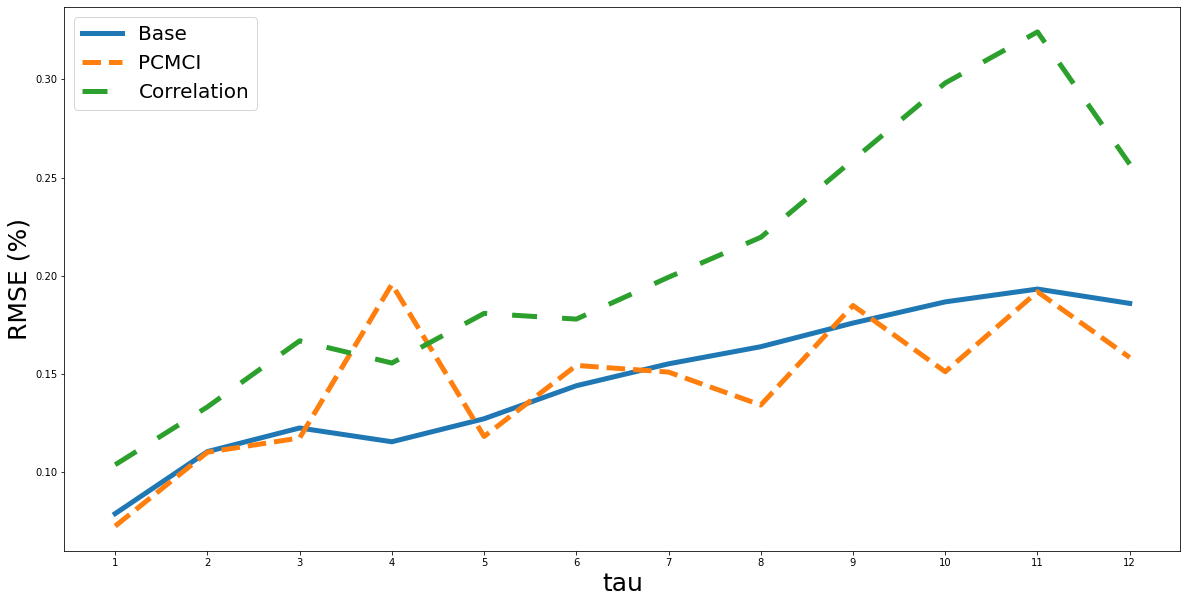

In [91]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("CAL197616.png")

In [10]:
model_V

[array([651.12659306]),
 array([1498.07246113]),
 array([1701.8080888]),
 array([4719.37702514]),
 array([1723.92280276]),
 array([2938.73672503]),
 array([2810.72683105]),
 array([2221.79804972]),
 array([4212.90074339]),
 array([2817.63264647]),
 array([4536.5810013])]

# ET

In [88]:
class_name = "BSh"
n_count = 81

base = []
corr = []
model = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_V_{}_{}.npy".format(tau, class_name))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_corr_{}_{}.npy".format(tau, class_name))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_{}_{}.npy".format(tau, class_name))))

base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count

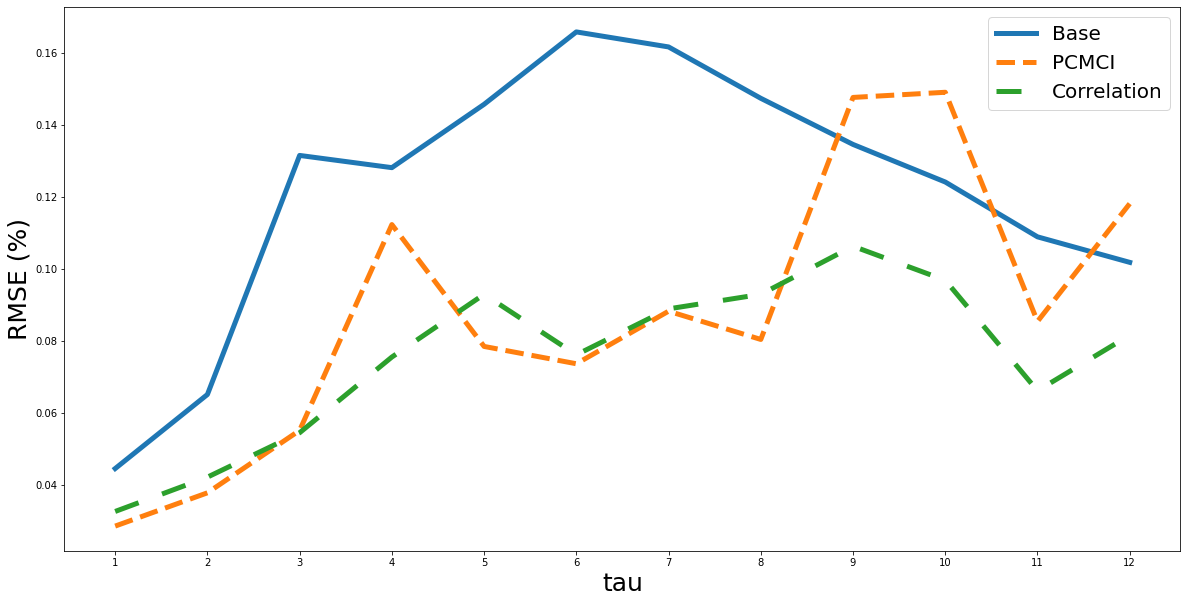

In [89]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("ET197616BSh.png")

In [14]:
class_name = "BSh"
n_count = 81

base = []
corr = []
model = []

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/base_V_{}_{}.npy".format(tau, class_name))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_corr_{}_{}.npy".format(tau, class_name))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_ET/model_V_{}_{}.npy".format(tau, class_name))))

    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
model_d = np.sqrt(model_d)/n_count

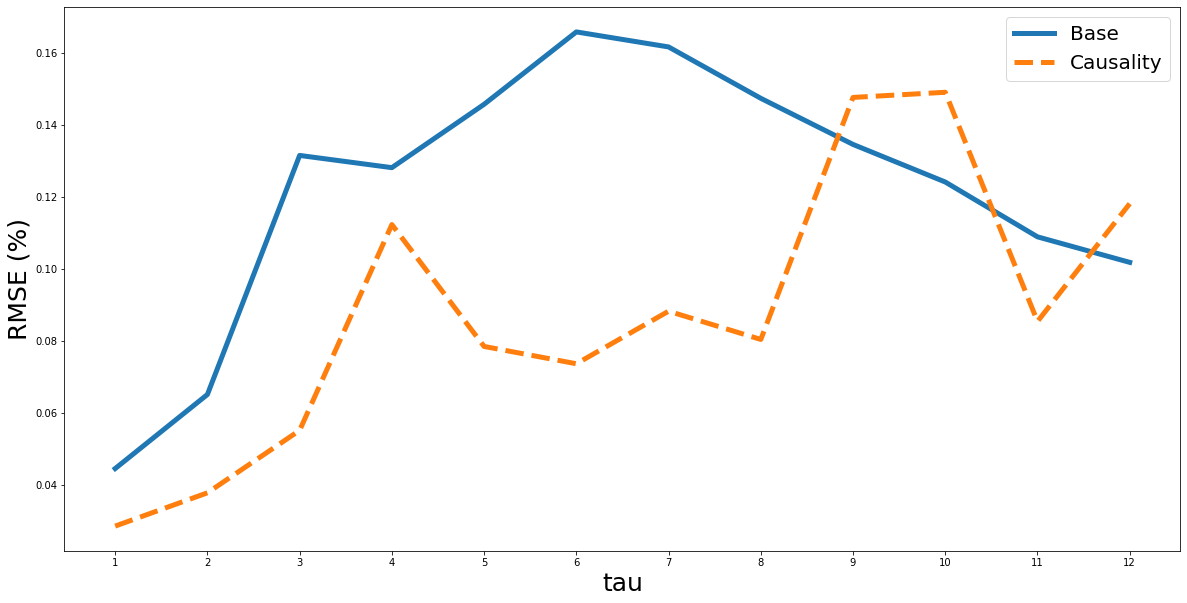

In [15]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [24]:
base = []
#corr = []
model_V = []
model_h = []

for tau in range(6,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/base_V_{}.npy".format(tau))))
    model_h.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_hybrid_{}.npy".format(tau))))
    #corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_corr_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))


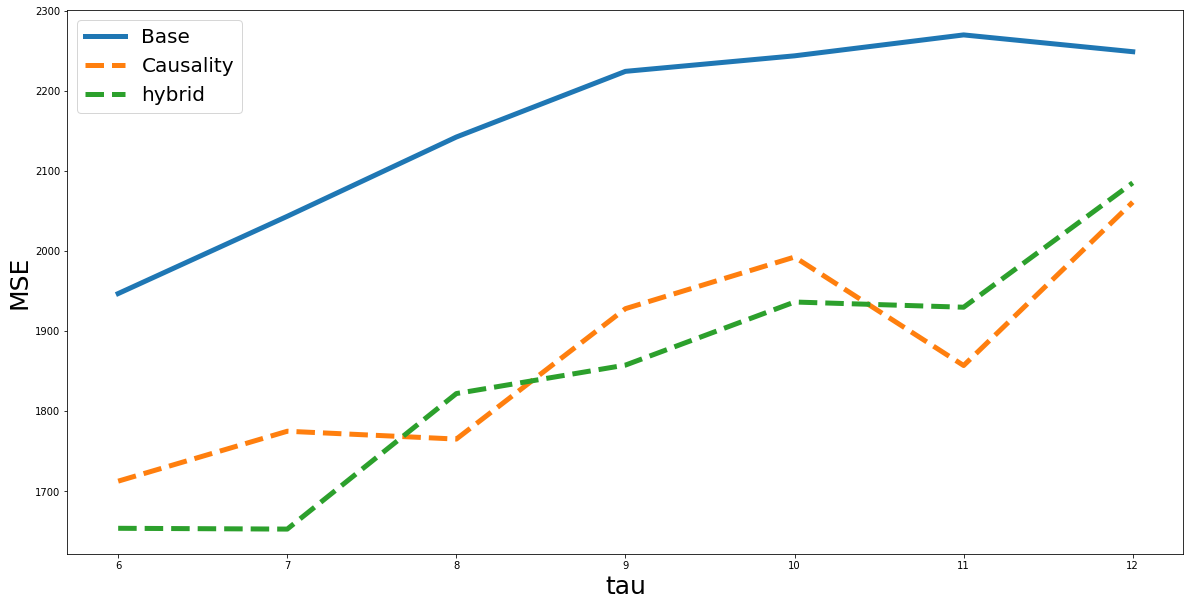

In [26]:
tau = np.arange(6,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, model_h, label = "hybrid", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [53]:
base = []
corr = []
model = []
model_gran = []
corr = []
shift = -1

for tau in range(1,13):
    base.append(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))[shift])
    corr.append(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))[shift])
    model.append(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))[shift])
    model_gran.append(np.load("../../whole_data_results/new_rotated_causality/model_gran_V_{}.npy".format(tau))[shift])
    #model.append(np.load("./new_trended_unrotated/model_V_{}.npy".format(tau))[shift])
    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count
#model_h = np.sqrt(model_h)/n_count
model_gran = np.sqrt(model_gran)/n_count


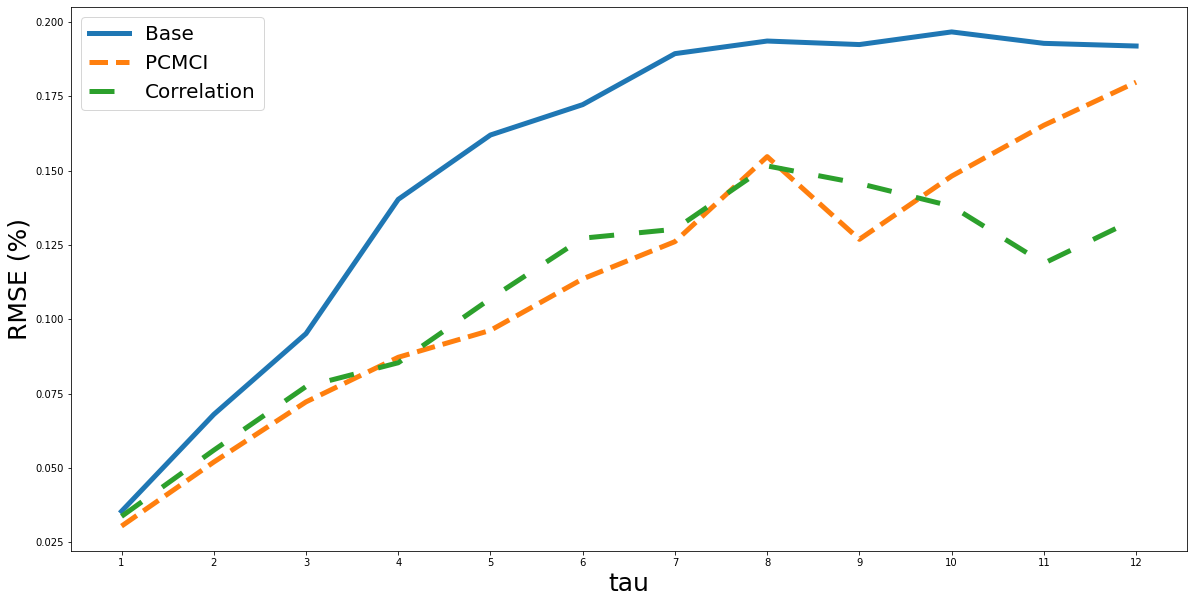

In [57]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_gran, label = "Granger", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))

plt.xticks(np.arange(min(tau), max(tau)+1, 1.0))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("ET197616.png")

In [75]:
test_start = 1981
test_end = 1985

In [83]:
r2_base = []
r2_corr = []
for tau in range(1,1):
    pred_base = np.load("./new_rotated_corr/pred_base_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    test_base = np.load("./new_rotated_corr/test_base_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    r2_base.append(r2_score(pred_base, test_base))

    pred_corr = np.load("./new_rotated_corr/pred_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    test_corr = np.load("./new_rotated_corr/test_corr_{}_{}_{}.npy".format(test_start, test_end,tau))
    r2_corr.append(r2_score(pred_corr,test_corr))

In [84]:
test_corr

array([ 30,  26,  25,  35,  25,  22,  72,  75,  90,  64,  57,  55,  54,
        57,  63,  68,  51,  56,  57,  57,  54,  63,  69,  74,  83,  93,
       107, 117, 108,  78, 101, 153, 146, 182, 187, 175, 165, 164, 136,
        77,  76,  94,  88,  31,  44,  35,  42])

In [85]:
len(test_base)

47

In [55]:
len(pred_corr)

39

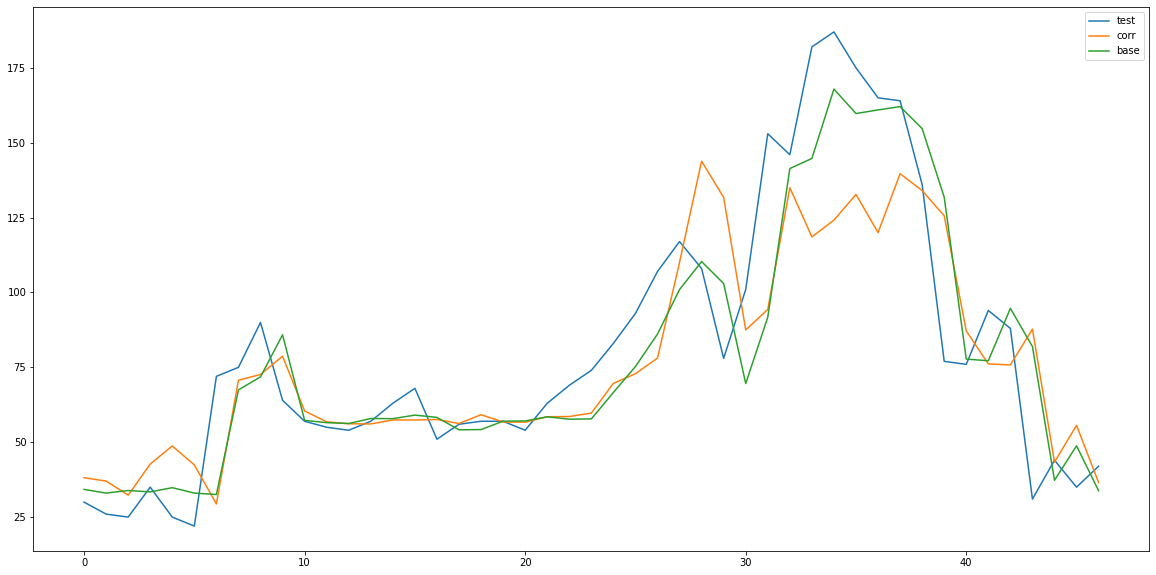

In [86]:
x = np.arange(len(test_base))
plt.plot(x,test_base, label = 'test')
plt.plot(x,pred_corr, label = 'corr')
plt.plot(x,pred_base, label = 'base')
plt.legend()

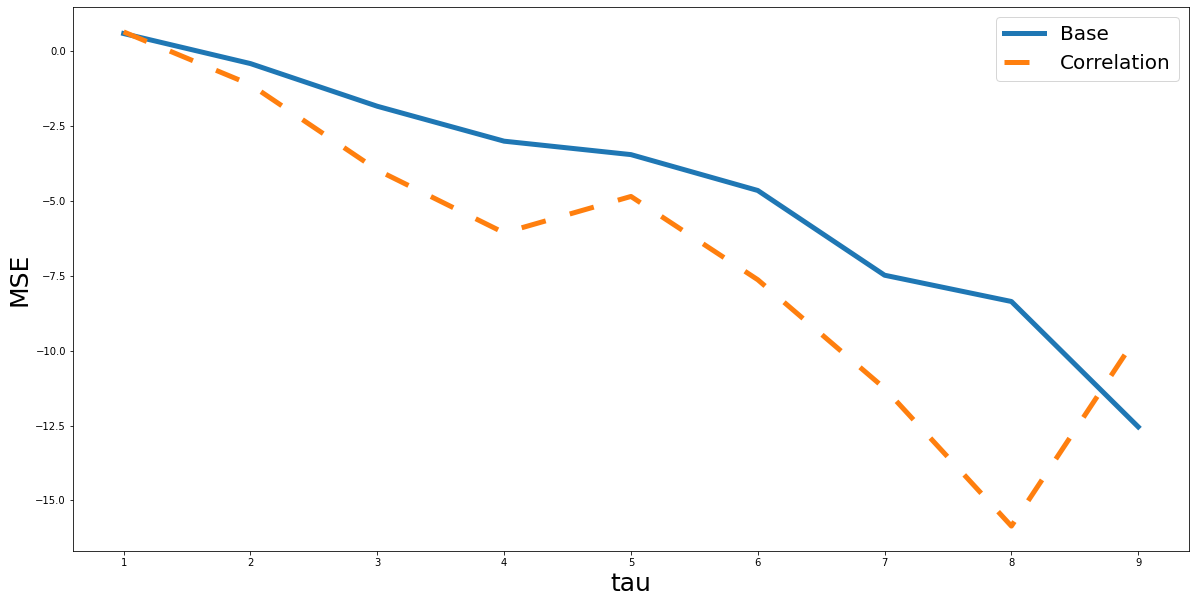

In [29]:
tau = np.arange(1,10)
plt.plot(tau, r2_base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, r2_corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));

In [39]:
np.sqrt(np.load("./new_rotated_causality/base_V_{}.npy".format(3)))/303

array([0.08827342, 0.06701329, 0.15318532, 0.0635939 , 0.13833814,
       0.15030767, 0.10406126, 0.11752449, 0.10038132, 0.09218247,
       0.09519113])

In [44]:
base = []
corr = []
base_d = []
model = []
model_V = []
model_gran = []
model_h = []
model_V_detrend = []
n_count = 303

for tau in range(1,13):
    base.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/base_V_{}.npy".format(tau))))
    model_gran.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_gran_V_{}.npy".format(tau))))
    corr.append(np.nanmean(np.load("../../whole_data_results/new_rotated_corr/model_V_corr_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("../../whole_data_results/new_rotated_causality/model_V_{}.npy".format(tau))))
    #model_V_detrend.append(np.mean(np.load("../../whole_data_results/new_rotated_detrended/model_V_{}.npy".format(tau))))
    model_h.append(np.nanmean(np.load("../../whole_data_results/new_rotated_detrended/model_V_hybrid_{}.npy".format(tau))))

    
base = np.sqrt(base)/n_count
model = np.sqrt(model)/n_count
corr = np.sqrt(corr)/n_count
model_h = np.sqrt(model_h)/n_count
model_gran = np.sqrt(model_gran)/n_count

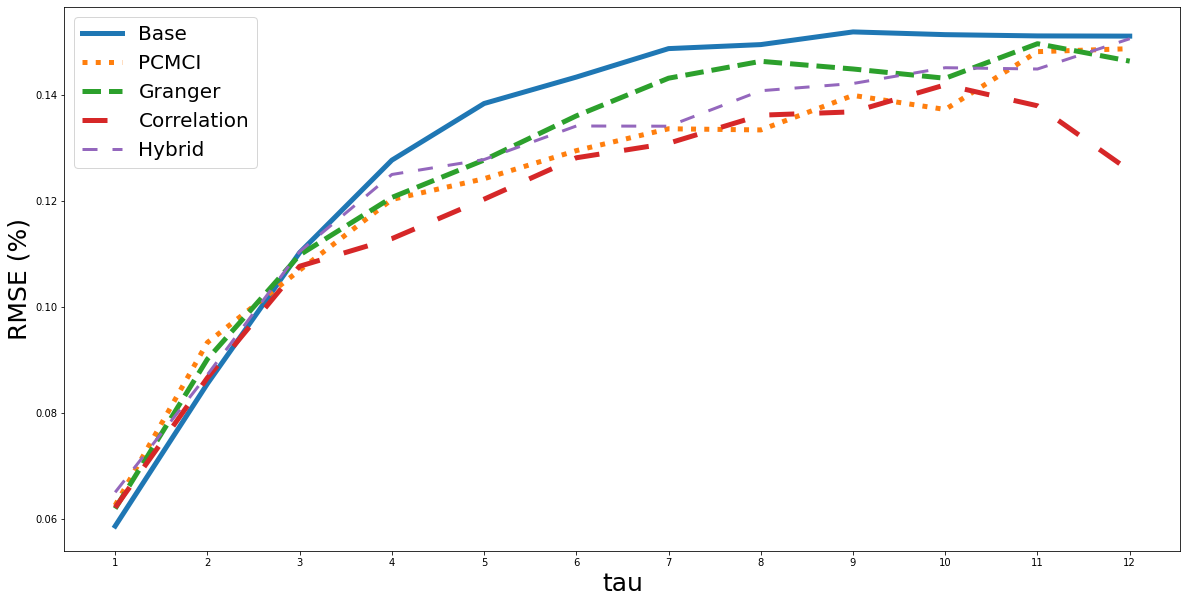

In [47]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "PCMCI", linewidth=5, linestyle="dotted")
plt.plot(tau, model_gran, label = "Granger", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_detrend, label = "model V detrended", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, model_h, label = "Hybrid",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, base_d, label = "Base Dettrend", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("RMSE (%)", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
plt.savefig("result.png")

In [41]:
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)


taus = np.arange(1,12,1)
corr_p = []
for tau in taus:
    test = []
    pred = []
    for ijz in range(len(train_start)):
        corr = []
        pred = np.load("./new_rotated_corr/pred_corr_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        test = np.load("./new_rotated_corr/test_corr_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        corr.append(st.pearsonr(pred, test)[0])
    corr_p.append(np.array(corr).mean())

NameError: name 'train_start' is not defined

In [31]:
test_start = np.arange(1961,2012,5)
test_end = np.arange(1965,2016,5)


taus = np.arange(1,12,1)
model_p = []
for tau in taus:
    test = []
    pred = []
    for ijz in range(len(train_start)):
        corr = []
        pred = np.load("./new_rotated_causality/pred_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        test = np.load("./new_rotated_causality/test_{}_{}_{}.npy".format(test_start[ijz],test_end[ijz],np.abs(tau)))
        corr.append(st.pearsonr(pred, test)[0])
    model_p.append(np.array(corr).mean())

In [28]:
model_p

[0.8957996483545767,
 0.6520382728216942,
 0.32794126406183055,
 0.2413101197840543,
 0.22106970933983516,
 0.1430047535855602,
 0.1555028624178327,
 0.22329709351072496,
 0.180709992335964,
 0.28520864416244557,
 -0.06556078974555421,
 0.0446933587656141]

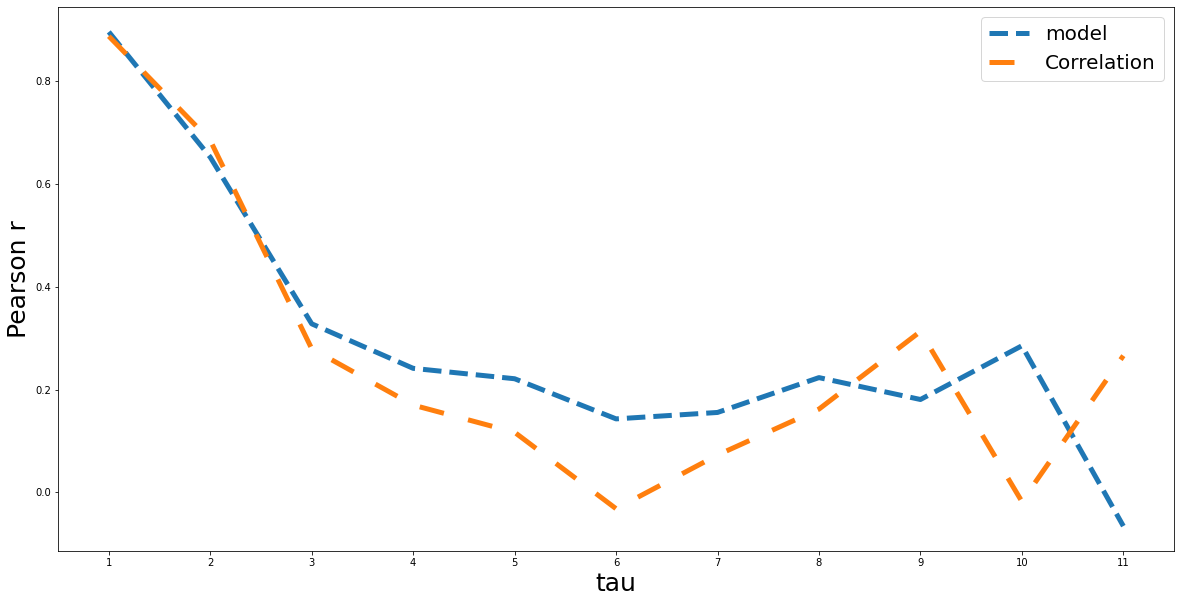

In [33]:
tau = np.arange(1,12)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model_V, label = "Causality trended", linewidth=5, linestyle="dotted")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dashed")
plt.plot(tau, model_p, label = "model", linewidth=5, linestyle="dashed")
plt.plot(tau, corr_p, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
#plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("Pearson r", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)

In [9]:
np.load("./new_rotated_causality/model_V_9.npy")

array([1238.6520541 ,  673.95895547, 3635.08924853,  934.25307432,
       3639.61600716, 2754.35507124, 1066.65117585, 1148.64906458,
       1561.37937082, 1664.48288764, 1478.02502399])

In [10]:
np.load("./new_rotated_causality/model_V_10.npy")

array([1281.38427805,  684.22567715, 3616.04814533,  809.23835822,
       3474.02053753, 2186.6479128 ,  986.63523037, 1231.64797155,
       1293.12544108, 1471.51828378, 2014.37132668])

In [7]:
model_V

[0.06023206749040954,
 0.08997436032389064,
 0.10310323113467379,
 0.11533068535178347,
 0.11913683952105965,
 0.12502716032598207,
 0.1285940454001331,
 0.12897562070919052,
 0.1350532415509983,
 0.1325967701508145,
 0.1408534203272969]

In [15]:
m = np.load("./new_rotated_causality/model_V_6.npy")

In [16]:
b = np.load("./new_rotated_causality/base_V_6.npy")

In [22]:
b.mean() - b.std()

918.9506775183892

In [23]:
m.mean()

1541.210863654006

In [28]:
np.load("./new_rotated/model_V_corr_12.npy")

array([2.46155428e-01, 1.52555585e-01, 1.76309569e+02,            nan,
       2.32574638e+01, 2.51937509e+00, 2.25005290e+00, 7.24429311e-01,
       1.02141040e+00, 9.00317738e-01, 2.71112569e-01])

In [23]:
np.arange(1926,1977,5)

array([1926, 1931, 1936, 1941, 1946, 1951, 1956, 1961, 1966, 1971, 1976])

In [25]:
np.arange(1960,2011,5)

array([1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])

In [5]:
base

[18.921033001194584, 19.0948363933772]

In [7]:
model_V

[6.335094516441647, 24.362499643044078]

Stationary

In [8]:
base = []
#corr = []
corr_V = []
model = []
model_V = []
clus = []

for tau in range(1,13):
    base.append(np.mean(np.load("./new_station/base_V_{}.npy".format(tau))))
    model.append(np.nanmean(np.load("./new_station/model_V_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./new5/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new5/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new5/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

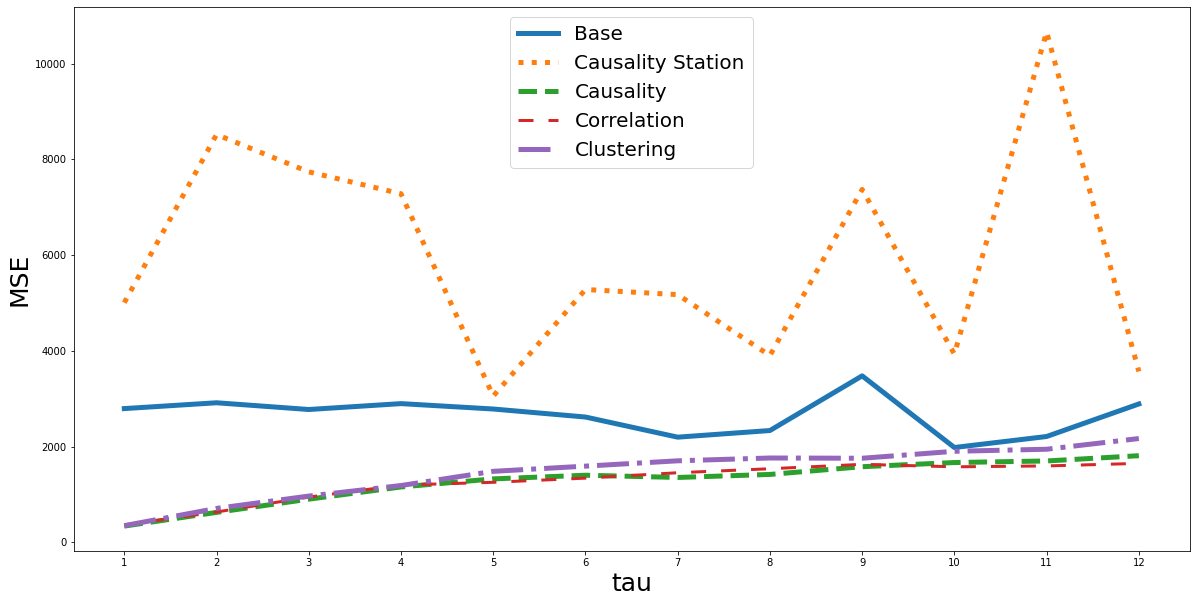

In [9]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality Station", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

Non_Stationary

In [5]:
#base = []
#corr = []
corr_V = []
#model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    #model.append(np.nanmean(np.load("./new5/model_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./new5/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new5/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new5/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

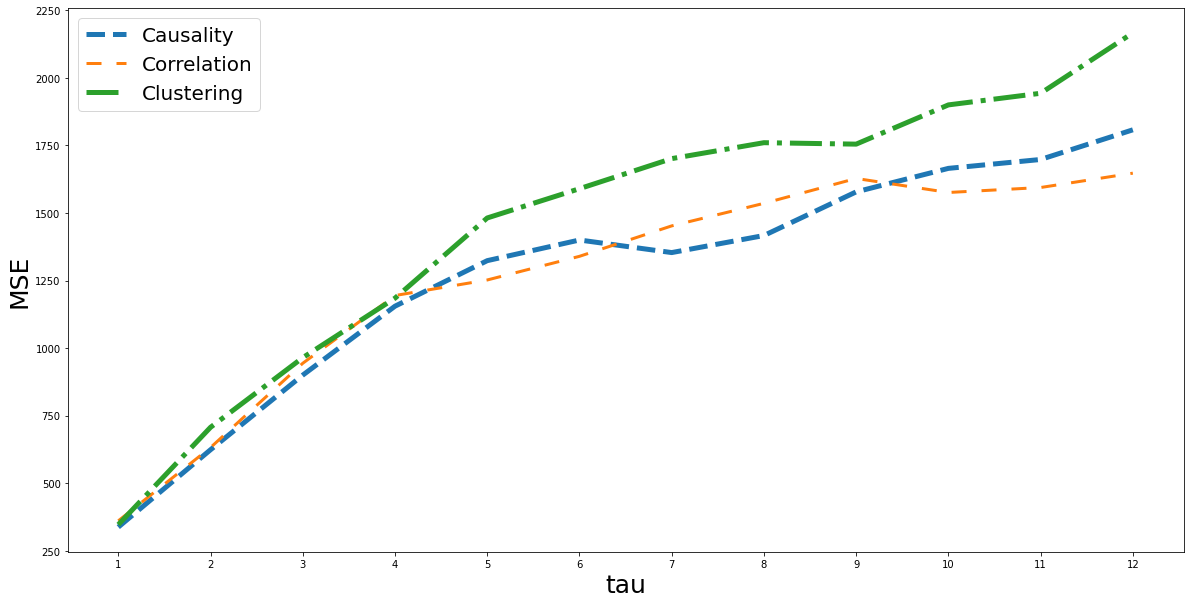

In [6]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [18]:
#base = []
#corr = []
corr_V = []
#model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    #model.append(np.nanmean(np.load("./agg/model_{}.npy".format(tau))))
    #corr.append(np.mean(np.load("./agg/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./agg/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./agg/model_clustering_{}.npy".format(tau))))
    model_V.append(np.nanmean(np.load("./agg/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

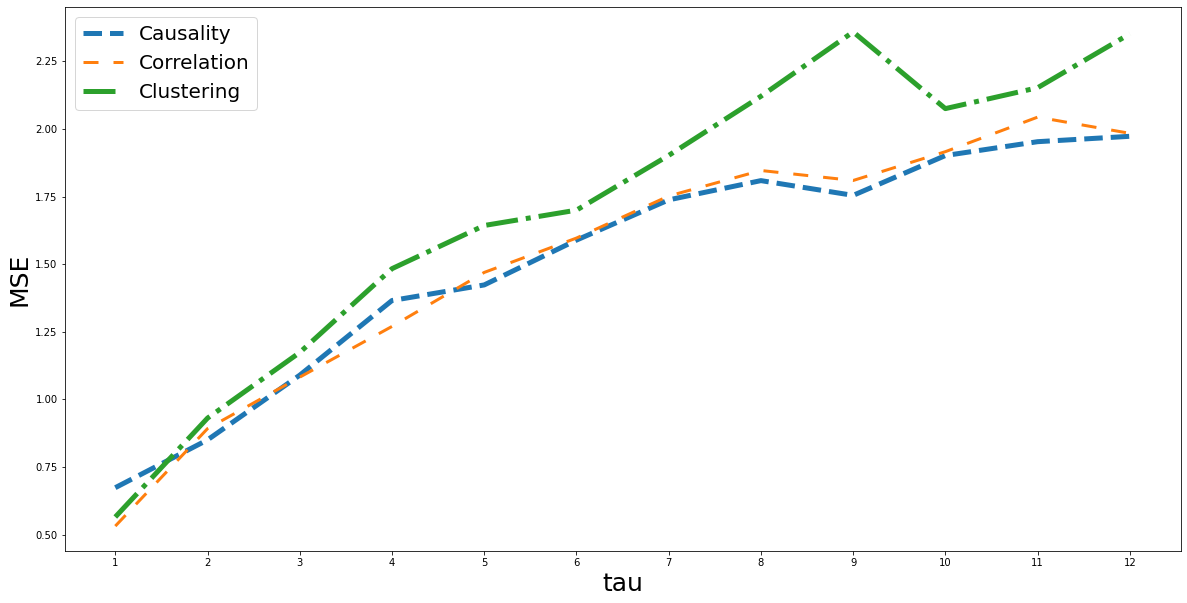

In [19]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
#plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
#plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [29]:
m2 = np.load("./new5/model_V_12.npy")
m1 = np.load("./new2/model_V_1.npy")

In [19]:
m.shape

(132,)

In [35]:
m1

array([1026.1153911 ,  530.40085675, 1668.92840453,  363.81748921,
       1240.08540478, 1336.44396876,  973.5000981 ,  767.61819879,
        878.88764166,  690.56280793,  421.42207376,  571.68975212,
        264.36849057, 1523.85408112,  260.48528755, 1074.98068539,
        848.54551546,  633.59563789,  543.62940586,  505.52831716,
        431.59188202,  201.25665304,  275.88600176,  199.88925018,
        757.5949127 ,  168.52505414,  591.84234593,  397.39010738,
        318.45369348,  275.69878316,  340.92552455,  309.31275674,
         74.56517236])

In [30]:
len(m2)

11

In [36]:
np.mean(m1[-11:])

337.2803274894408

array([1026.1153911 ,  530.40085675, 1668.92840453,  363.81748921,
       1240.08540478, 1336.44396876,  973.5000981 ,  767.61819879,
        878.88764166,  690.56280793,  421.42207376,  571.68975212,
        264.36849057, 1523.85408112,  260.48528755, 1074.98068539,
        848.54551546,  633.59563789,  543.62940586,  505.52831716,
        431.59188202,  201.25665304,  275.88600176,  199.88925018,
        757.5949127 ,  168.52505414,  591.84234593,  397.39010738,
        318.45369348,  275.69878316,  340.92552455,  309.31275674,
         74.56517236])

In [23]:
train_start = np.arange(1926,1977,5)

In [25]:
len(train_start) * 12

132

In [32]:
#base = []
corr = []
corr_V = []
model = []
model_V = []
clus = []

for tau in range(1,13):
    #base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new3/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new3/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new3/model_corr_90_V_{}.npy".format(tau))))
    clus.append(np.nanmean(np.load("./new3/model_clustering_{}.npy".format(tau))))
    model_V.append(np.mean(np.load("./new3/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

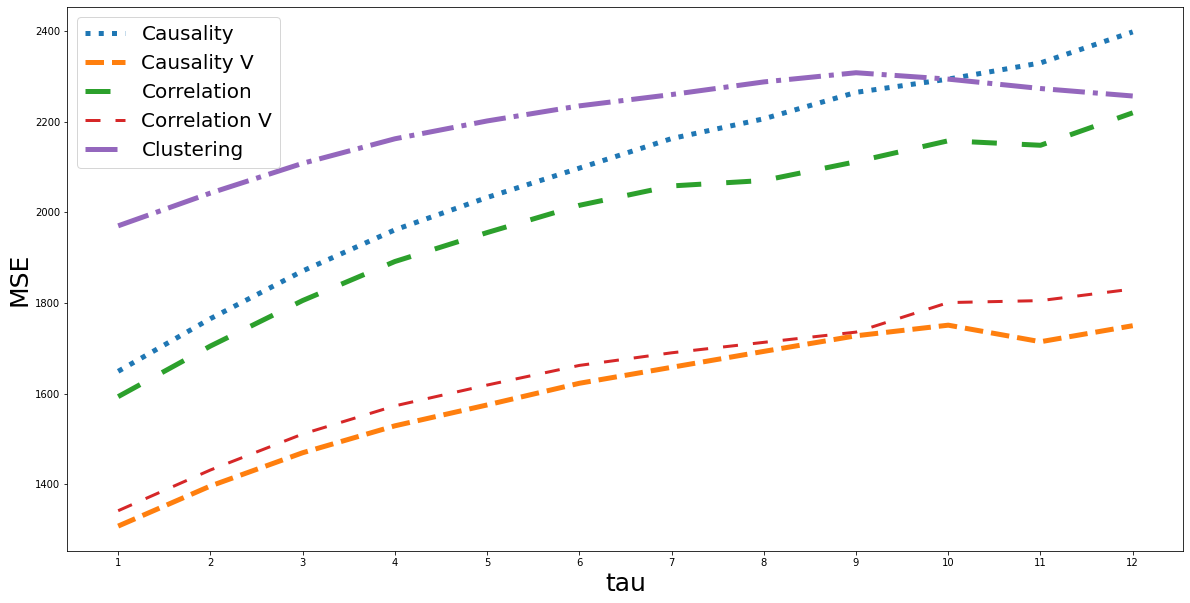

In [33]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality V", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [34]:
model_V

[1307.8603805513008,
 1396.2538013634514,
 1469.6223925456877,
 1528.9740606448995,
 1575.0357895388,
 1622.8053489252982,
 1658.0365407318955,
 1693.1612411501553,
 1727.5658440562008,
 1750.967543144936,
 1714.4632456368265,
 1749.8060232552182]

In [36]:
model_V_1

[620.223989270473,
 761.695820160989,
 899.7983941241905,
 1292.7883283074038,
 1361.7186685574902,
 1399.9543053987193,
 1449.3450633235618,
 1497.3199016082729,
 1578.1105479284795,
 1665.071610572096,
 1752.905015513838,
 1807.7985974925514]

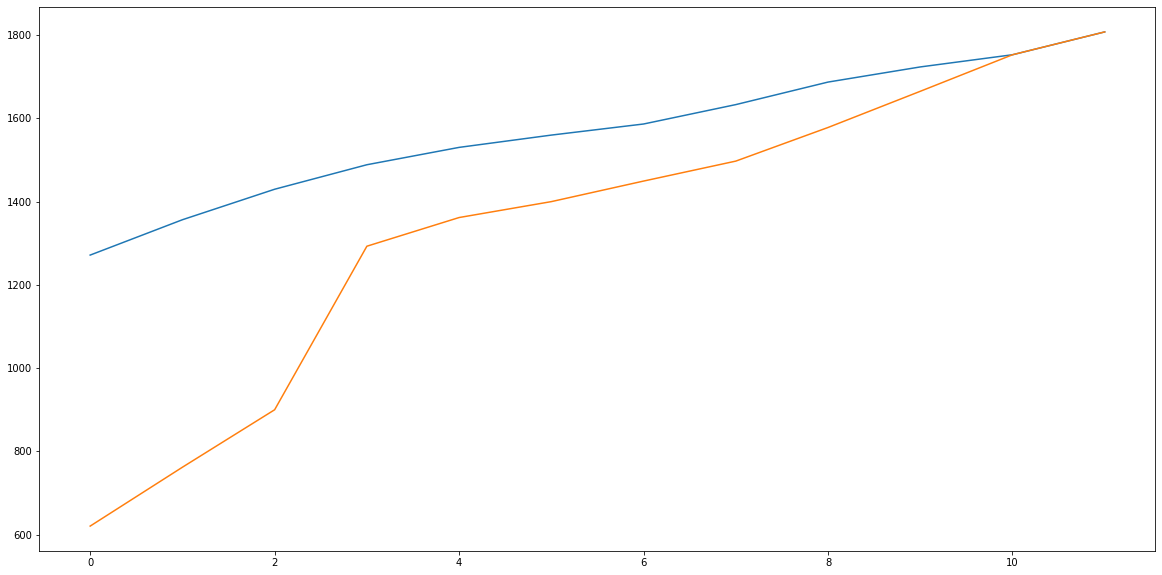

In [15]:
plt.plot(np.arange(len(model_V)), model_V,np.arange(len(model_V)), model_V_1)

In [38]:
np.arange(12)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [14]:
base = []
corr = []
corr_V = []
model = []
model_V_1 = []
clus = []

for tau in range(1,13):
    base.append(np.mean(np.load("./new2/base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new2/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new2/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new2/model_corr_90_V_{}.npy".format(tau))))
    #clus.append(np.nanmean(np.load("./new2/model_clustering_{}.npy".format(tau))))
    model_V_1.append(np.mean(np.load("./new5/model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

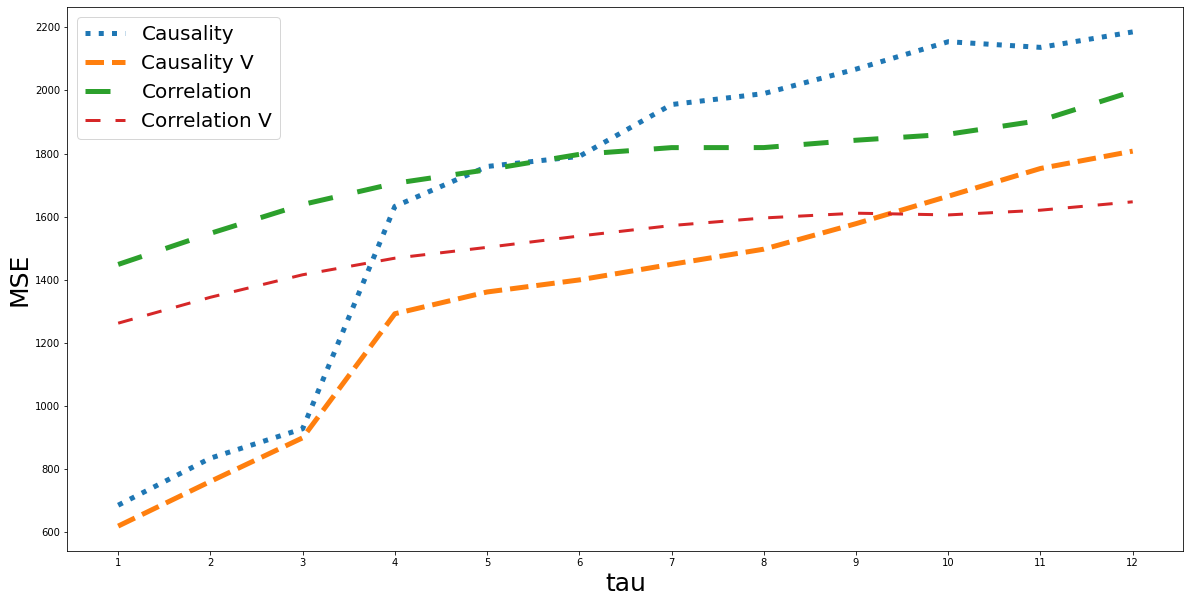

In [8]:
tau = np.arange(1,13)
#plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V_1, label = "Causality V", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
#plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)
plt.xticks(np.arange(min(tau), max(tau)+1, 1.0));
#plt.axvline(5)
#plt.axvline(10)
#plt.xticks(fontsize=18)
#plt.savefig("result.png")

In [9]:
model_V

[1271.4961486920074,
 1356.4248597104227,
 1429.708021061686,
 1488.5868684991858,
 1530.2942710856798,
 1559.8387338527396,
 1586.4861385950762,
 1633.1042889632633,
 1687.2480473820629,
 1723.6272138665909,
 1752.905015513838,
 1807.7985974925514]

In [10]:
model_V_1

[620.223989270473,
 761.695820160989,
 899.7983941241905,
 1292.7883283074038,
 1361.7186685574902,
 1399.9543053987193,
 1449.3450633235618,
 1497.3199016082729,
 1578.1105479284795,
 1665.071610572096,
 1752.905015513838,
 1807.7985974925514]

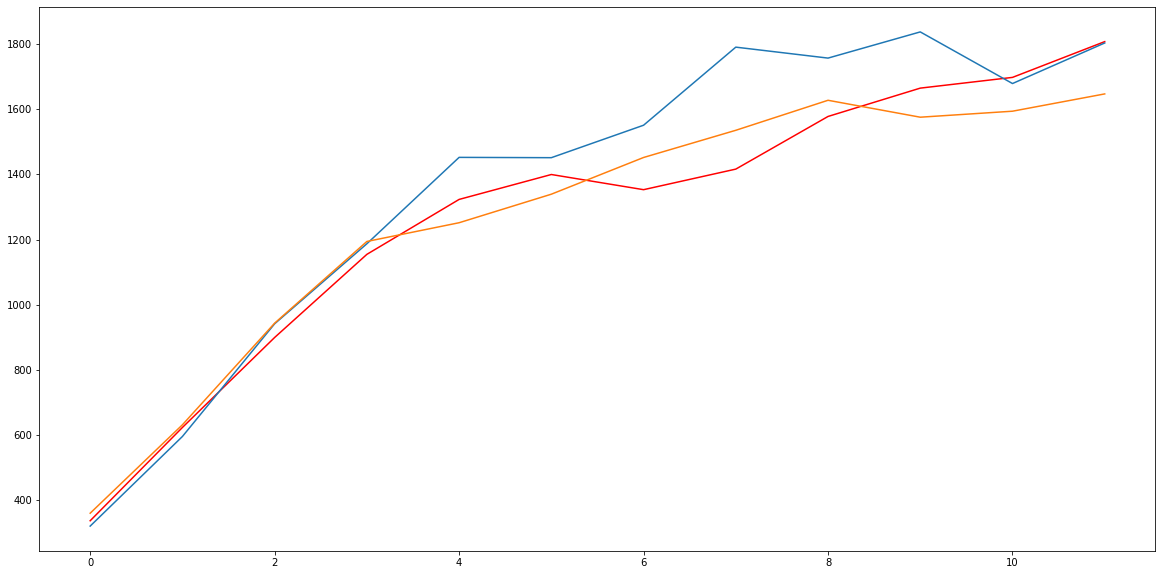

In [22]:
plt.plot(np.arange(len(model_V_1)),model_V_1, color="r")
plt.plot(np.arange(len(model_V_1)),model_V)
plt.plot(np.arange(len(model_V_1)),corr_V)

In [5]:
base = []
corr = []
corr_V = []
clus = []
model = []
model_V = []
#model_V_orac = []

for tau in range(1,13):
    base.append(np.mean(np.load("./base_V_{}.npy".format(tau))))
    model.append(np.mean(np.load("./new/model_{}.npy".format(tau))))
    corr.append(np.mean(np.load("./new/model_corr_90_{}.npy".format(tau))))
    corr_V.append(np.mean(np.load("./new/model_corr_V_90_{}.npy".format(tau))))
    clus.append(np.mean(np.load("./new/model_clustering_{}.npy".format(tau))))
    model_V.append(np.mean(np.load("./model_V_{}.npy".format(tau))))
    #model_V_orac.append(np.mean(np.load("./new_orac/model_V_{}.npy".format(tau))))

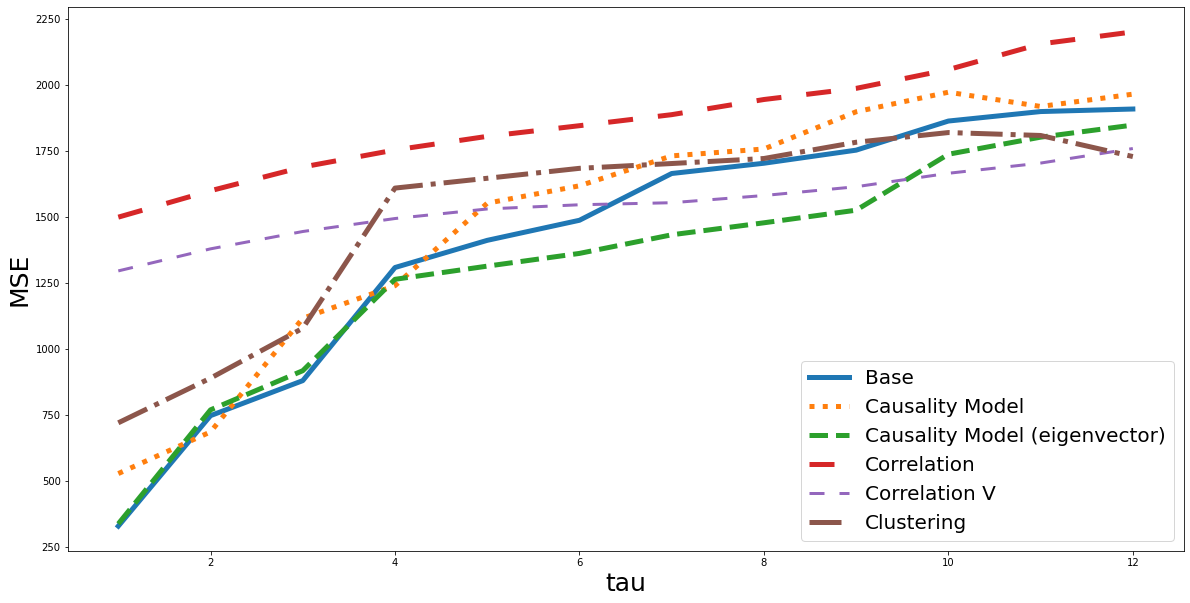

In [6]:
tau = np.arange(1,13)
plt.plot(tau, base, label = "Base", linewidth=5, linestyle="solid")
plt.plot(tau, model, label = "Causality Model", linewidth=5, linestyle="dotted")
plt.plot(tau, model_V, label = "Causality Model (eigenvector)", linewidth=5, linestyle="dashed")
#plt.plot(tau, model_V_orac, label = "Causality Model (eigenvector) Orac", linewidth=5, linestyle="dashed")
plt.plot(tau, corr, label = "Correlation",linewidth=5, linestyle=(0,(5,5)))
plt.plot(tau, corr_V, label = "Correlation V",linewidth=3, linestyle=(0,(5,5)))
plt.plot(tau, clus, label = "Clustering", linewidth=5, linestyle="dashdot")
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)

In [34]:
clus.append(np.nan)

In [7]:
clus = []
for tau in range(1,19):
    clus.append(np.mean(np.load("./new/model_clustering_{}.npy".format(tau))))

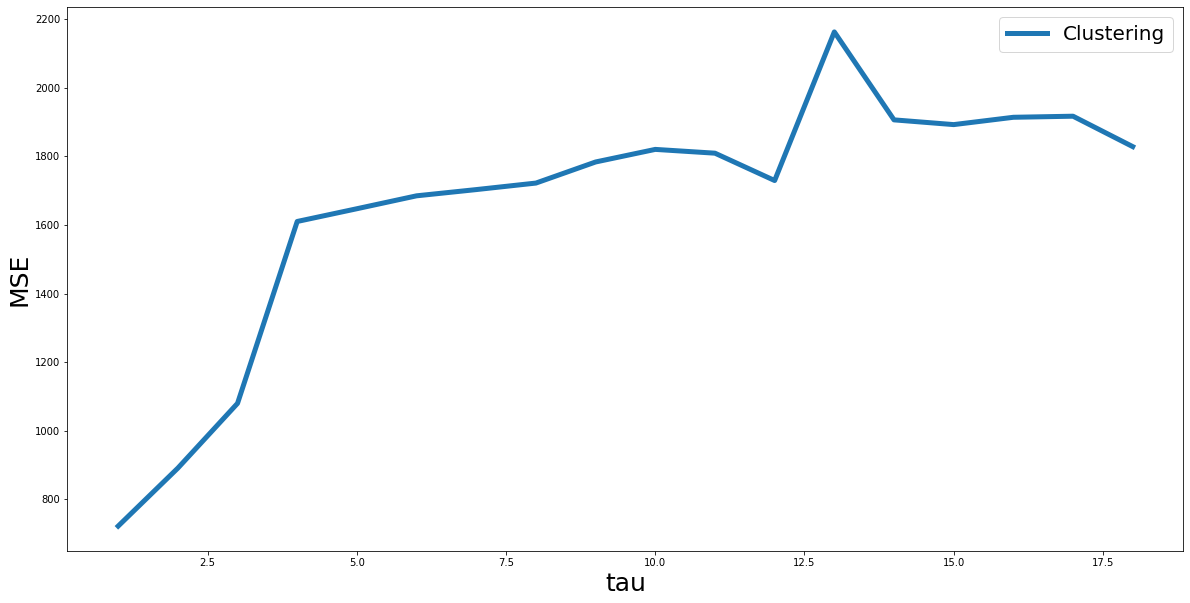

In [9]:
tau = np.arange(1,19)
plt.plot(tau, clus, label = "Clustering", linewidth=5)
#plt.plot(tau, base_clus, label = "Base Model")
plt.xlabel("tau",fontsize = 25)
plt.ylabel("MSE", fontsize = 25)
plt.legend(fontsize = 20)

In [ ]:
[34 -2]
[35 -9]
[62 -4]
[52 -3]
[ 1 -1]
[60 -3]
[23 -4]
[29 -6]
[ 38 -10]
[ 54 -11]
[38 -8]
[74 -1]
[32 -3]
[71 -4]
[ 35 -10]
[37 -7]
[56 -9]
[ 13 -12]
[60 -2]
[53 -5]
[ 68 -10]
[23 -1]
[70 -8]
[ 51 -11]
[ 21 -11]
[34 -9]
[23 -2]
[ 6 -3]
[ 48 -12]
[ 26 -11]
[52 -4]
[ 64 -10]
[53 -3]
[76 -6]
[ 7 -8]
[49 -3]
[57 -1]
[34 -5]
[ 9 -9]
[16 -8]
[ 65 -10]
[74 -4]
[ 14 -10]
[17 -7]
[ 57 -11]
[75 -4]
[71 -6]
[ 19 -10]
[ 63 -12]
[43 -8]
[21 -8]
[18 -8]
[31 -9]
[72 -2]
[ 35 -12]
[16 -1]
[52 -5]
[58 -7]
[ 66 -10]
[ 11 -10]
[59 -5]
[68 -3]
[  1 -10]
[ 1 -2]


In [ ]:
[[34 -2]
[35 -9]
[62 -4]
[52 -3]
[ 1 -1]
[60 -3]
[23 -4]
[29 -6]
[ 38 -10]
[ 54 -11]
[38 -8]
[74 -1]
[32 -3]
[71 -4]
[ 35 -10]
[37 -7]
[56 -9]
[ 13 -12]
[60 -2]
[53 -5]
[ 68 -10]
[23 -1]
[70 -8]
[ 51 -11]
[ 21 -11]
[34 -9]
[23 -2]
[ 6 -3]
[ 48 -12]
[ 26 -11]
[52 -4]
[ 64 -10]
[53 -3]
[76 -6]
[ 7 -8]
[49 -3]
[57 -1]
[34 -5]
[ 9 -9]
[16 -8]
[ 65 -10]
[74 -4]
[ 14 -10]
[17 -7]
[ 57 -11]
[75 -4]
[71 -6]
[ 19 -10]
[ 63 -12]
[43 -8]
[21 -8]
[18 -8]
[31 -9]
[72 -2]
[ 35 -12]
[16 -1]
[52 -5]
[58 -7]
[ 66 -10]
[ 11 -10]
[59 -5]
[68 -3]
[  1 -10]
[ 1 -2]]

In [11]:
l = np.load("./link1/link_1926_1960.npy")

In [14]:
l

array([[ 34,  -2],
       [ 35,  -9],
       [ 62,  -4],
       [ 52,  -3],
       [  1,  -1],
       [ 60,  -3],
       [ 23,  -4],
       [ 29,  -6],
       [ 38, -10],
       [ 54, -11],
       [ 38,  -8],
       [ 74,  -1],
       [ 32,  -3],
       [ 71,  -4],
       [ 35, -10],
       [ 37,  -7],
       [ 56,  -9],
       [ 13, -12],
       [ 60,  -2],
       [ 53,  -5],
       [ 68, -10],
       [ 23,  -1],
       [ 70,  -8],
       [ 51, -11],
       [ 21, -11],
       [ 34,  -9],
       [ 23,  -2],
       [  6,  -3],
       [ 48, -12],
       [ 26, -11],
       [ 52,  -4],
       [ 64, -10],
       [ 53,  -3],
       [ 76,  -6],
       [  7,  -8],
       [ 49,  -3],
       [ 57,  -1],
       [ 34,  -5],
       [  9,  -9],
       [ 16,  -8],
       [ 65, -10],
       [ 74,  -4],
       [ 14, -10],
       [ 17,  -7],
       [ 57, -11],
       [ 75,  -4],
       [ 71,  -6],
       [ 19, -10],
       [ 63, -12],
       [ 43,  -8],
       [ 21,  -8],
       [ 18,  -8],
       [ 31,